In [1]:
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
from scipy import stats # contains stats functions and is used to visualise probability distributions
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns # a more user-friendly library used for visualisations

In [2]:
df = pd.read_csv('CardioGoodFitness.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
df_treadmills = df.copy()
df_tm_describe = df_treadmills.groupby(by='Product').describe()
df_tm_describe

Age                                                  Education  \
        count   mean       std   min    25%   50%    75%   max     count   
Product                                                                    
TM195    80.0  28.55  7.221452  18.0  23.00  26.0  33.00  50.0      80.0   
TM498    60.0  28.90  6.645248  19.0  24.00  26.0  33.25  48.0      60.0   
TM798    40.0  29.10  6.971738  22.0  24.75  27.0  30.25  48.0      40.0   

                    ...   Income           Miles                               \
              mean  ...      75%       max count        mean        std   min   
Product             ...                                                         
TM195    15.037500  ...  53439.0   68220.0  80.0   82.787500  28.874102  38.0   
TM498    15.116667  ...  53439.0   67083.0  60.0   87.933333  33.263135  21.0   
TM798    17.325000  ...  90886.0  104581.0  40.0  166.900000  60.066544  80.0   

                                     
           25%    50%    75%    max  
Product                              
TM195     66.0   85.0   94.0  188.0  
TM498     64.0   85.0  106.0  212.0  
TM798    120.0  160.0  200.0  360.0  

[3 rows x 48 columns]

In [4]:
print(f"Product Types: {df['Product'].unique()}")
print(f"Product Types: {df['MaritalStatus'].unique()}")

Product Types: ['TM195' 'TM498' 'TM798']
Product Types: ['Single' 'Partnered']


In [5]:
df_TM195_msk = df_treadmills[df_treadmills['Product'] == 'TM195']
df_TM498_msk = df_treadmills[df_treadmills['Product'] == 'TM498']
df_TM798_msk = df_treadmills[df_treadmills['Product'] == 'TM798']

In [6]:
print("========TM195========")
print(f"Average Income: ${df_TM195_msk['Income'].mean()}")
print("========TM498========")
print(f"Average Income: ${df_TM498_msk['Income'].mean()}")
print("========TM798========")
print(f"Average Income: ${df_TM798_msk['Income'].mean()}")

========TM195========
Average Income: $46418.025
========TM498========
Average Income: $48973.65
========TM798========
Average Income: $75441.575


In [7]:
print("========TM195========")
print(f"Average Edu: {df_TM195_msk['Education'].mean()}")
print("========TM498========")
print(f"Average Edu: {df_TM498_msk['Education'].mean()}")
print("========TM798========")
print(f"Average Edu: {df_TM798_msk['Education'].mean()}")

========TM195========
Average Edu: 15.0375
========TM498========
Average Edu: 15.116666666666667
========TM798========
Average Edu: 17.325


In [8]:
print("========TM195========")
print(f"Average Miles: {df_TM195_msk['Miles'].mean()}")
print("========TM498========")
print(f"Average Miles: {df_TM498_msk['Miles'].mean()}")
print("========TM798========")
print(f"Average Miles: {df_TM798_msk['Miles'].mean()}")

========TM195========
Average Miles: 82.7875
========TM498========
Average Miles: 87.93333333333334
========TM798========
Average Miles: 166.9


In [9]:
print("========TM195========")
print(f"Average Usage: {df_TM195_msk['Usage'].mean()}")
print("========TM498========")
print(f"Average Usage: {df_TM498_msk['Usage'].mean()}")
print("========TM798========")
print(f"Average Usage: {df_TM798_msk['Usage'].mean()}")

========TM195========
Average Usage: 3.0875
========TM498========
Average Usage: 3.066666666666667
========TM798========
Average Usage: 4.775


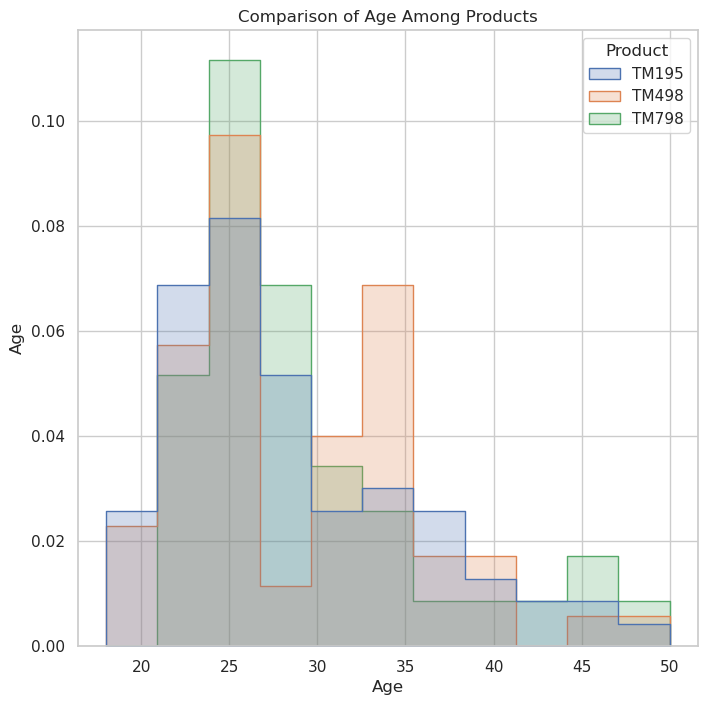

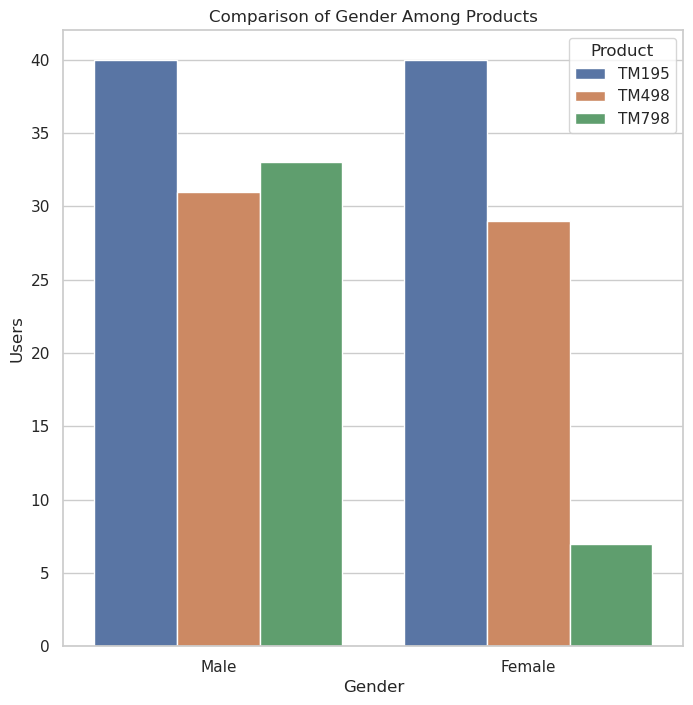

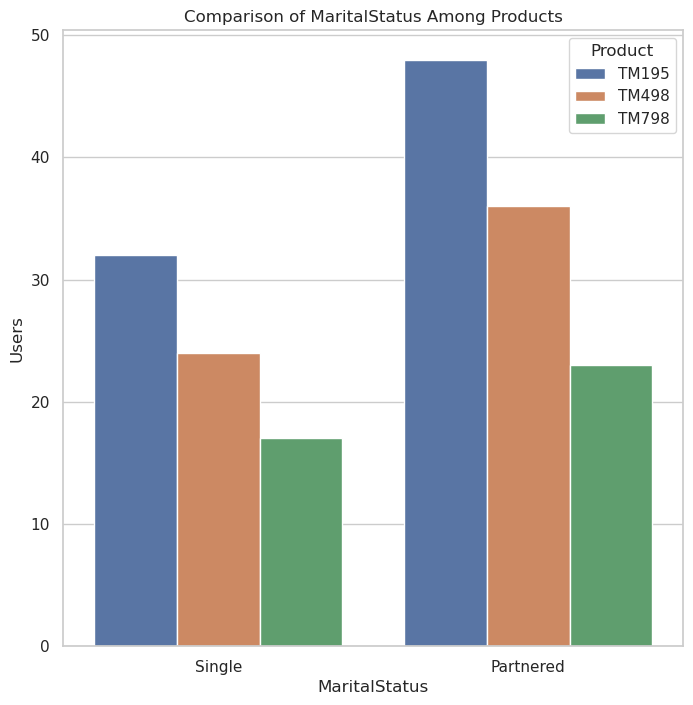

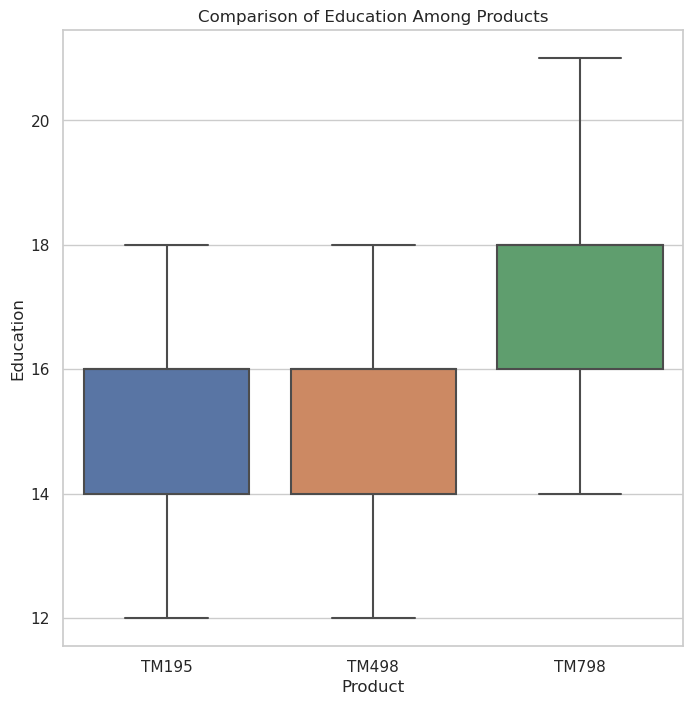

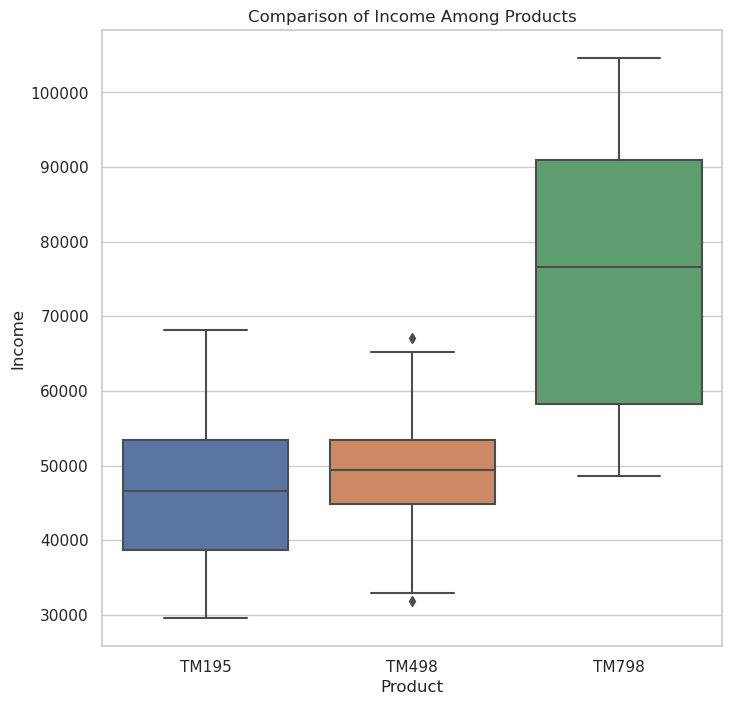

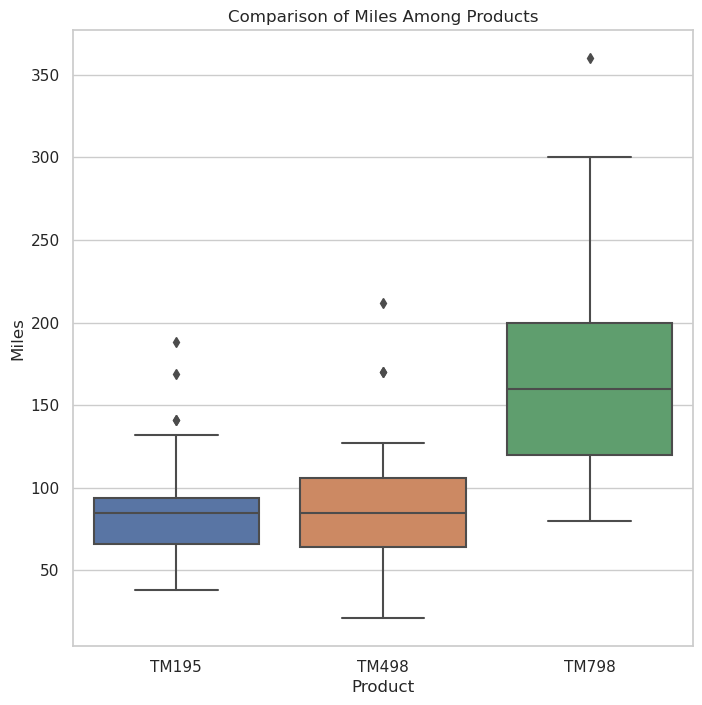

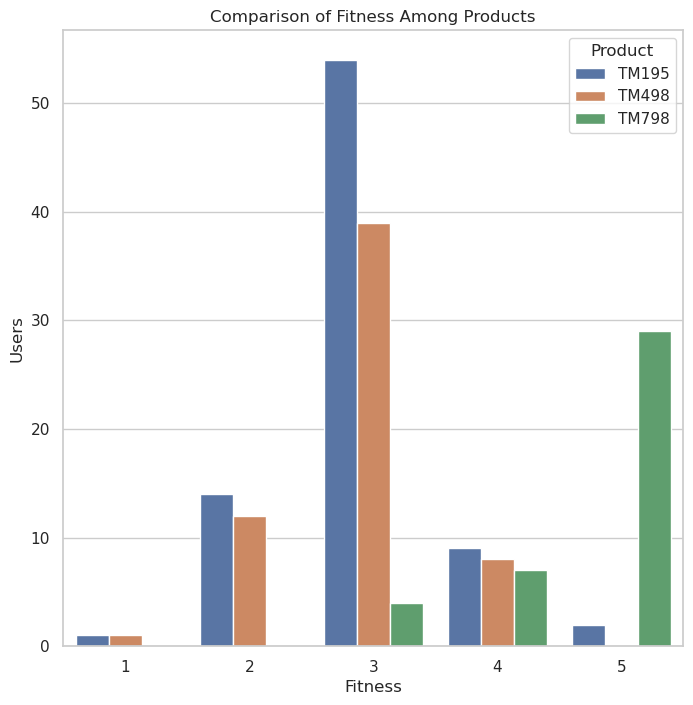

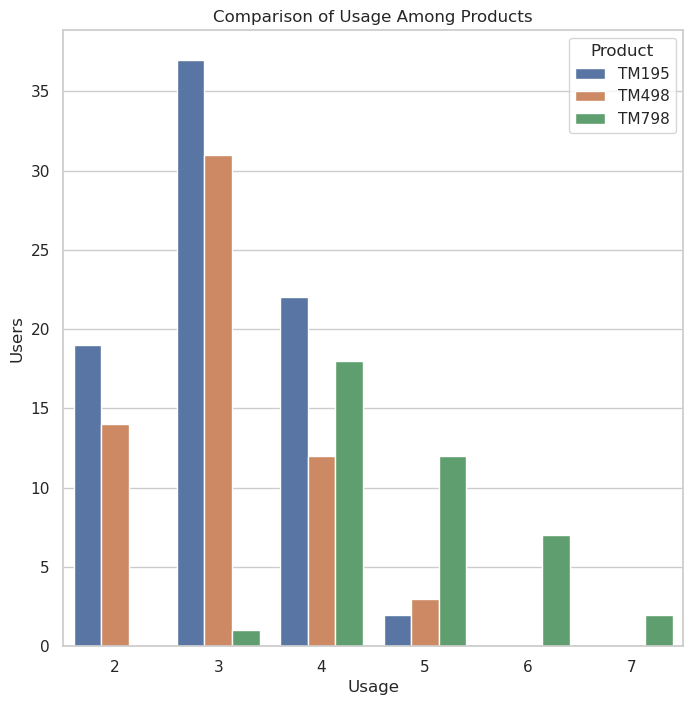

In [37]:
#Ramla's code
# Setting up the aesthetics for the plots
#sns.set(style="whitegrid")
 
# Creating a function to plot the visualizations
def plot_comparisons(df, column, plot_type):
    plt.figure(figsize=(8, 8))
 
    if plot_type == 'histogram':
        sns.histplot(data=df, x=column, hue="Product", element="step", stat="density", common_norm=False)
    elif plot_type == 'bar':
        sns.countplot(data=df, x=column, hue="Product")
    elif plot_type == 'box':
        sns.boxplot(data=df, x="Product", y=column)
 
    plt.title(f'Comparison of {column} Among Products')
    plt.ylabel(column if plot_type != 'bar' else 'Users')
    plt.xlabel(column if plot_type != 'box' else 'Product')
    plt.show()
 
# Plotting comparisons
columns_to_plot = ['Age', 'Gender', 'MaritalStatus','Education', 'Income', 'Miles','Fitness','Usage']
plot_types = ['histogram', 'bar', 'bar', 'box', 'box', 'box', 'bar', 'bar']
 
for column, plot_type in zip(columns_to_plot, plot_types):
    plot_comparisons(df, column, plot_type)